<a href="https://colab.research.google.com/github/ishawagh19/cs480student/blob/main/01/Copy_of_CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

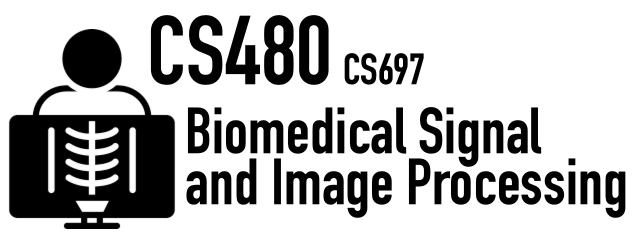
# Assignment 1


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [ ]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

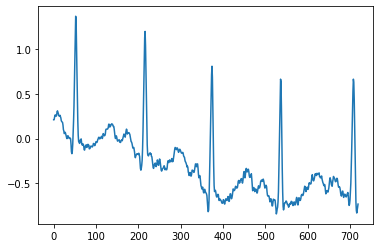

In [ ]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds
samples_from9to11sec=ecg[9*SAMPLING_RATE:11*SAMPLING_RATE]
plt.plot(samples_from9to11sec)

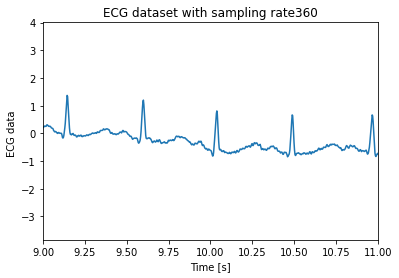

In [ ]:
time_in_sec=np.arange(ecg.size)/SAMPLING_RATE
plt.title('ECG dataset with sampling rate' + str(SAMPLING_RATE))
plt.xlabel('Time [s]')
plt.ylabel('ECG data ')
plt.xlim([9,11])
plt.plot(time_in_sec,ecg)

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [ ]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [ ]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

In [ ]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [ ]:
rpeaks['ECG_R_Peaks'][0:10]

array([ 125,  343,  552,  748,  944, 1130, 1317, 1501, 1691, 1880])

In [ ]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


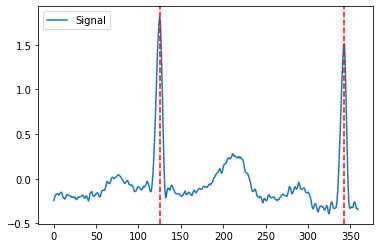

In [ ]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [ ]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

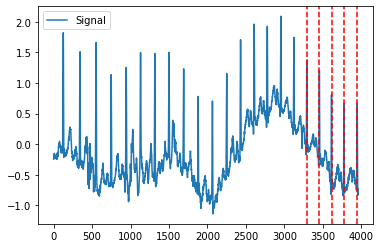

In [ ]:
plot=nk.events_plot(rpeaks['ECG_R_Peaks'][17:22],ecg[0:SAMPLING_RATE*11])

**Task 3:** Detect Heartrate. [15 Points]

In [ ]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

Yes the patient has a regular heart rate of approximately 100bps.The average rate of R peaks over a 10 second period is 17. To get the average beats per minute it is multiplied by 6 which is 102bpm.

**Task 4:** Detect P Q S T Peaks. [25 Points]

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

In [ ]:
# TODO Does the detection work well?
rpeaks_from9to11sec=rpeaks['ECG_R_Peaks'][17:22]
rpeaks_from9to11sec

array([3292, 3456, 3614, 3776, 3948])

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


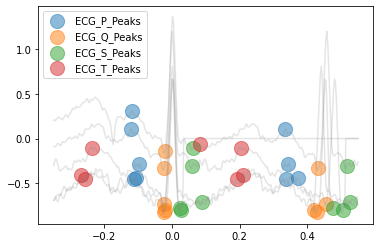

In [ ]:
_, waves_peak=nk.ecg_delineate(ecg[0:SAMPLING_RATE*11], rpeaks_from9to11sec, SAMPLING_RATE, show=True, show_type='peaks')

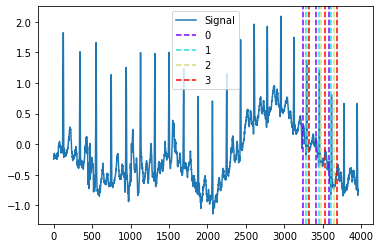

In [ ]:
#Zoom the first 3 pictures with focus on T,P,Q,S-peaks
plot = nk.events_plot([waves_peak['ECG_P_Peaks'][:3],
                       waves_peak['ECG_Q_Peaks'][:3],
                       waves_peak['ECG_S_Peaks'][:3],
                       waves_peak['ECG_T_Peaks'][:3]], ecg[0:SAMPLING_RATE*11])

Yes definitely. It  correctly identified the P-peaks,Q-peaks,S-peaks,T-peaks for this signal.

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


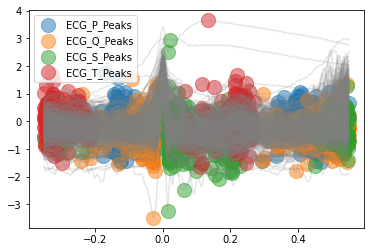

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(ecg, rpeaks, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
filtered_signal = nk.signal_filter(ecg, SAMPLING_RATE, lowcut=12, highcut=15, method='butterworth', order=2)
filtered_signal

array([-0.00837756, -0.00606743, -0.00363716, ...,  0.00053765,
        0.00100794,  0.0013115 ])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


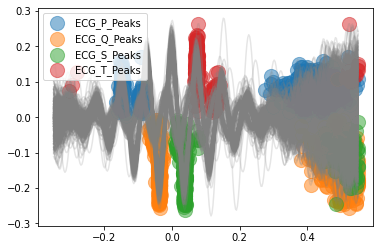

In [ ]:
_, waves_peak = nk.ecg_delineate(filtered_signal, rpeaks, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [ ]:
# TODO Does the filtering improve the result?


Yes

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#